In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

import pickle
import json

from scipy.stats import shapiro,kstest,normaltest,skew


import warnings
warnings.filterwarnings("ignore")

### 1.problem statement

to predict  the charges of person by using following features
age
gender
bmi
children
smoker
region
charges

### 2.data gathering

In [2]:
df=pd.read_csv("medical_insurance.csv")
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(1).T

,0
age,19
gender,female
bmi,27.9
children,0
smoker,yes
region,southwest
charges,16884.924


# 3.EDA

### 3.1 age  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


all values are interger no need to preprosscing on this column

### 3.2  gender 

In [5]:
df['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [6]:
df['gender'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [7]:
df['gender']=df['gender'].replace({'male': 1, 'female': 0})
df['gender']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: gender, Length: 1338, dtype: int64

In [8]:
gender_data={'male': 1, 'female': 0}

### 3.3  bmi 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [10]:
df['bmi'].isna().sum()

0

### 3.4 children  

In [11]:
#column contain all integer so no need to preprocessing

### 3.5 smoker

In [12]:
df['smoker'].isna().sum()

0

In [13]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [15]:
df['smoker'].replace({'no': 0, 'yes': 1},inplace=True)

In [16]:
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [17]:
smoker_data={'no': 0, 'yes': 1}

### 3.6 region 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [19]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [20]:
df=pd.get_dummies(df,columns=['region'])
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


### 3.7 charges

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   gender            1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [22]:
df['charges'].isnull().sum()

0

### children

In [23]:
#all vales are in int in children

## feature engineering

1linearity
2.vif

### 1.linearity

In [24]:
df.corr()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [25]:
df.corr().iloc[:,[5]]

,charges
age,0.299008
gender,0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
charges,1.000000
region_northeast,0.006349
region_northwest,-0.039905
region_southeast,0.073982
region_southwest,-0.043210


<Axes: >

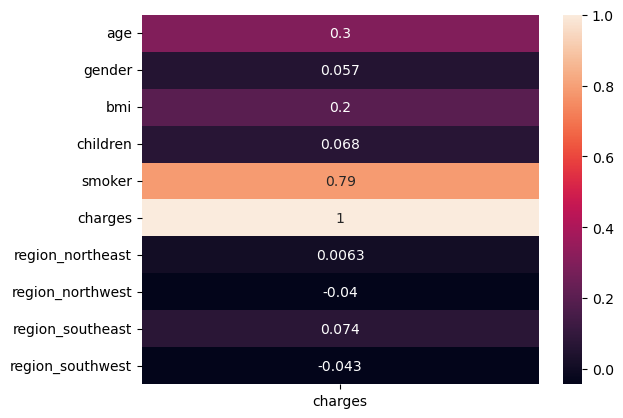

In [26]:
sns.heatmap(df.corr().iloc[:,[5]],annot=True)

# model training

In [27]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [28]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
x_train

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
161,18,0,36.850,0,1,0,0,1,0
1032,30,0,27.930,0,0,1,0,0,0
151,48,1,29.700,0,0,0,0,1,0
759,18,1,38.170,0,1,0,0,1,0
362,19,0,21.700,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
278,59,1,31.790,2,0,0,0,1,0
432,42,1,26.900,0,0,0,0,0,1
1283,18,1,30.030,1,0,0,0,1,0
1265,64,1,23.760,0,1,0,0,1,0


In [30]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [31]:
linear_reg.intercept_

-12769.446696034029

In [32]:
linear_reg.coef_

array([  261.80941261,   -61.58127854,   341.21029945,   408.05504938,
       23849.21742012,   385.87628468,    86.07605795,  -306.70493123,
        -165.2474114 ])

### testing_data_evalution

In [33]:
y_pred=linear_reg.predict(x_test)

In [34]:
mse=mean_squared_error(y_test,y_pred)
print("mean sqaured error: ",mse)
rmse=np.sqrt(mse)
print("root mean sqaured error: ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("mean absloute error: ",mae)
r_sqaured=r2_score(y_test,y_pred)
print("R sqaured :",r_sqaured)

n=x_test.shape[0]
k=x_test.shape[1]
adj_r2=1-((1-r_sqaured)*(n-1))/(n-k-1)
print("adjusted_r2 values: ",adj_r2)

mean sqaured error:  41761889.1906428
root mean sqaured error:  6462.343939364632
mean absloute error:  4319.4500900367275
R sqaured : 0.7100098801471331
adjusted_r2 values:  0.6998939457336609


### traning_data_evalution

In [35]:
y_pred_train=linear_reg.predict(x_train)

In [36]:
mse=mean_squared_error(y_train,y_pred_train)
print("mean sqaured error: ",mse)
rmse=np.sqrt(mse)
print("root mean sqaured error: ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("mean absloute error: ",mae)
r_sqaured=r2_score(y_train,y_pred_train)
print("R sqaured :",r_sqaured)

n=x_train.shape[0]
k=x_train.shape[1]
adj_r2=1-((1-r_sqaured)*(n-1))/(n-k-1)
print("adjusted_r2 values: ",adj_r2)

mean sqaured error:  35240347.237063214
root mean sqaured error:  5936.358078575046
mean absloute error:  4143.046171517502
R sqaured : 0.7605423221866592
adjusted_r2 values:  0.7585091909599422


### single row testing

In [37]:
x_test[55:56].T

,1157
age,23.00
gender,0.00
bmi,23.18
children,2.00
smoker,0.00
region_northeast,0.00
region_northwest,1.00
region_southeast,0.00
region_southwest,0.00


In [38]:
age=23.00
gender='male'
bmi=23.18
children=2
smoker='yes'
region='northeast'

column_name=x.columns.tolist()
gender=gender_data[gender]
smoker=smoker_data[smoker]
region="region_"+region
region_index=column_name.index(region)
test_array=np.zeros([1,linear_reg.n_features_in_])
test_array[0][0]=age
test_array[0][1]=gender
test_array[0][2]=bmi
test_array[0][3]=children
test_array[0][4]=smoker
region_index=x_train.columns.tolist().index(region)
test_array[0][region_index]=1
predicted_charges=np.around(linear_reg.predict(test_array)[0],3)
predicted_charges

26151.047

In [39]:
with open ('medical_insurance.pkl','wb') as f:
    pickle.dump(linear_reg,f)

In [40]:
projct_data=({"Gender":gender_data,"Smoker":smoker_data,"Column Names":column_name})

In [41]:
with open("proj_data.json",'w') as f:
    json.dump(projct_data,f)